### 사용 DB생성
-Mmysql client 이용


- DROP DATABASE IF EXISTS student_mgmt;
- CREATE DATABASE student_mgmt DEFAULT CHARSET=utf8 COLLATE=utf8_bin;


 DEFAULT CHARSET=utf8 COLLATE=utf8_bin
  - 문자 인코딩(문자셋)과 관련된 설정 
    - 한글 데이터의 정확한 처리를 위해, 데이터베이스/테이블 생성시에 추가
    - 문자셋(Character set)은 각 문자가 컴퓨터에 저장될 때 어떠한 '코드'로 저장될지에 대한 규칙의 집합을 의미
  - 콜레이션(Collation)은 특정 문자 셋에 의해 데이터베이스에 저장된 값들을 비교 검색하거나 정렬 등의 작업을 위해 문자들을 서로 '비교' 할때 사용하는 규칙들의 집합을 의미


* 테이블 생성

USE student_mgmt;

DROP TABLE IF EXISTS students;

CREATE TABLE students (
  id TINYINT NOT NULL AUTO_INCREMENT,
  name VARCHAR(10) NOT NULL,
  gender ENUM('man','woman') NOT NULL,
  birth DATE NOT NULL,
  english TINYINT NOT NULL,
  math TINYINT NOT NULL,
  korean TINYINT NOT NULL,
  PRIMARY KEY (id)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;



- ENUM 타입: 특정 값만 저장할 수 있도록 저장 가능 값을 지정해주는 데이터 타입
- ENGINE=InnoDB : 스토리지 엔진이 여러 가지 있음 이 중에서 InnoDB로 스토리지 엔진을 정해주는 명령 이 명령을 안해줘도 최근 Mysql 버전은 디폴트로 엔진을 InnoDB를 쓴다고 함
- 테이블을 만들때도 DEFAULT CHARSET=utf8 인코딩


- 데이터 입력

In [ ]:
INSERT INTO students (name, gender, birth, english, math, korean) VALUES ('dave', 'man', '1983-07-16', 90, 80, 71);
INSERT INTO students (name, gender, birth, english, math, korean) VALUES ('minsun', 'woman', '1982-10-16', 30, 88, 60);
INSERT INTO students (name, gender, birth, english, math, korean) VALUES ('david', 'man', '1982-12-10', 78, 77, 30);
INSERT INTO students (name, gender, birth, english, math, korean) VALUES ('jade', 'man', '1979-11-1', 45, 66, 20);
INSERT INTO students (name, gender, birth, english, math, korean) VALUES ('jane', 'man', '1990-11-12', 65, 32, 90);
INSERT INTO students (name, gender, birth, english, math, korean) VALUES ('wage', 'woman', '1982-1-13', 76, 30, 80);
INSERT INTO students (name, gender, birth, english, math, korean) VALUES ('tina', 'woman', '1982-12-3', 87, 62, 71);


In [5]:
#### pandes 라이브러리와 pymysql

1. read_sql()


    - sql 연결객체를 활용하여 쿼리 구문으로 반환된 결과를 데이터 프레임으로 바로 생성해 주는 함수

In [9]:
import pymysql
import pandas as pd


In [10]:
host_name = 'localhost'
host_port = 3306
username = 'root'
password = '0000'
database_name='student_mgmt'

In [11]:
# 연결
db = pymysql.connect(
    host=host_name,     # MySQL Server Address
    port=host_port,     # MySQL Server Port
    user=username,      # MySQL username
    passwd=password,    # password for MySQL username
    db=database_name,   # Database name
    charset='utf8'
)


pandas.read.sql(쿼리,연결된 db connection 객체)

In [14]:
sql="show tables"


In [15]:
df=pd.read_sql(sql,db)

In [16]:
df

Tables_in_student_mgmt
0               students

In [17]:
sql="select *from students"
df=pd.read_sql(sql,db)

In [18]:
df

id    name gender       birth  english  math  korean
0   1    dave    man  1983-07-16       90    80      71
1   2  minsun  woman  1982-10-16       30    88      60
2   3   david    man  1982-12-10       78    77      30
3   4    jade    man  1979-11-01       45    66      20
4   5    jane    man  1990-11-12       65    32      90
5   6    wage  woman  1982-01-13       76    30      80
6   7    tina  woman  1982-12-03       87    62      71

In [19]:
type(df["gender"][0])

str

In [21]:
type(df["math"][0])  # 테이블의 컬럼 형식을 그대로 유지한다.

numpy.int64

In [22]:
df.to_csv('students.csv', sep=',', index=False, encoding='utf-8')
df


id    name gender       birth  english  math  korean
0   1    dave    man  1983-07-16       90    80      71
1   2  minsun  woman  1982-10-16       30    88      60
2   3   david    man  1982-12-10       78    77      30
3   4    jade    man  1979-11-01       45    66      20
4   5    jane    man  1990-11-12       65    32      90
5   6    wage  woman  1982-01-13       76    30      80
6   7    tina  woman  1982-12-03       87    62      71

In [23]:
db.close()

### 외래키(FOREIGN KEY)를 만드는 이유
* 두 테이블 사이에 관계를 선언해서, 데이터의 무결성을 보장


In [54]:
import pymysql
import pandas as pd


In [55]:
host_name = 'localhost'
host_port = 3306
username = 'root'
password = '0000'
database_name='student_mgmt'

In [56]:
db = pymysql.connect(
    host=host_name,     # MySQL Server Address
    port=host_port,          # MySQL Server Port
    user=username,      # MySQL username
    passwd=password,    # password for MySQL username
    db=database_name,   # Database name
    charset='utf8'
)


In [58]:
sql = "select * from usertbl"
df = pd.read_sql(sql,db)
df

DatabaseError: Execution failed on sql 'select * from usertbl': (1146, "Table 'student_mgmt.usertbl' doesn't exist")

#### buyTbl에 데이터를 추가
- 외래키로 지정되어 잇는 userID에 입려고디는 새로운 값 stj가 userTbl애 없는 값이어서 무결성 오류 발생

In [59]:
# buyTbl에 데이터를 추가
cursor=db.cursor()
sql_quert="INSERT INTO buyTbl (userID, prodName, groupName, price, amount) VALUES('STJ', '운동화', '의류', 30, 2);"
curcor.execute(sql_query)
db.commit()

NameError: name 'curcor' is not defined

#### 에러가 나면 정상임
* CONSTRAINT `buyTbl_ibfk_1` FOREIGN KEY (`userID`) REFERENCES `userTbl` (`userID`)
* userTbl 에 userID가 STJ인 데이터가 없기 때문에, 
  - FOREIGN KEY (userID) REFERENCES userTbl(userID)
  - buyTbl 테이블의 userID 커럼은 userTbl 테이블의 userID를 참조할 때, userTbl 테이블에 userID가 STJ인 데이터가 없으면, 입력이 안됨
  - 데이터 무결성 (두 테이블간 관계에 있어서, 데이터의 정확성을 보장하는 제약 조건을 넣는 것임)
  - 현업에서는 꼭 필요한 경우만 사용하는 경우가 많음 (비즈니스 로직이 다양하기 때문에, 제약을 걸어놓을 경우, 예외적인 비즈니스 로직 처리가 어렵기 때문)


In [ ]:
cursor = db.cursor()
SQL_QUERY = "INSERT INTO buyTbl (userID, prodName, groupName, price, amount) VALUES('BBK', '운동화', '의류', 30, 2);"
cursor.execute(SQL_QUERY)
db.commit()


In [ ]:
#### 에러나면 ,가능하면 한번 db connection 닫아주시고,ektl connection 해주는 편이 좋을 수 있습니다.

In [45]:
db.close

<bound method Connection.close of <pymysql.connections.Connection object at 0x000000000A3DB760>>

In [50]:
#db 연결을 활성화 해주는 함수 구현

def conn(d_name):
    
    import pymysql
    host_name = 'localhost'
    host_port = 3306
    username = 'root'
    password = '0000'
    database_name=d_name

    db = pymysql.connect(
        host=host_name,     # MySQL Server Address
        port=host_port,          # MySQL Server Port
        user=username,      # MySQL username
        passwd=password,    # password for MySQL username
        db=database_name,   # Database name
        charset='utf8'
    )
    return db

In [51]:
conn("sqlDB")  # 반드시 외래키이후 코드 재확인....망할...

#### 이번에는 userTbl 에 userID가 STJ 인 데이터를 넣어준 후에, 다시 buyTbl userID에 STJ 관련 데이터를 넣어줍니다.


In [ ]:
SQL_QUERY = "INSERT INTO buyTbl (userID, prodName, groupName, price, amount) VALUES('STJ', '운동화', '의류', 30, 2);"
cursor.execute(SQL_QUERY)
db.commit()


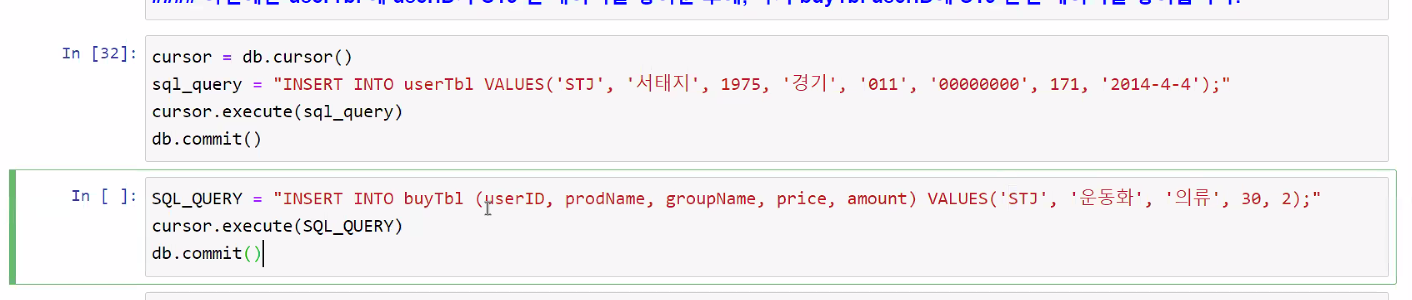

#### 이번에는 userTbl에 userID가 STJ 관련 데이터를 삭제해봅니다.


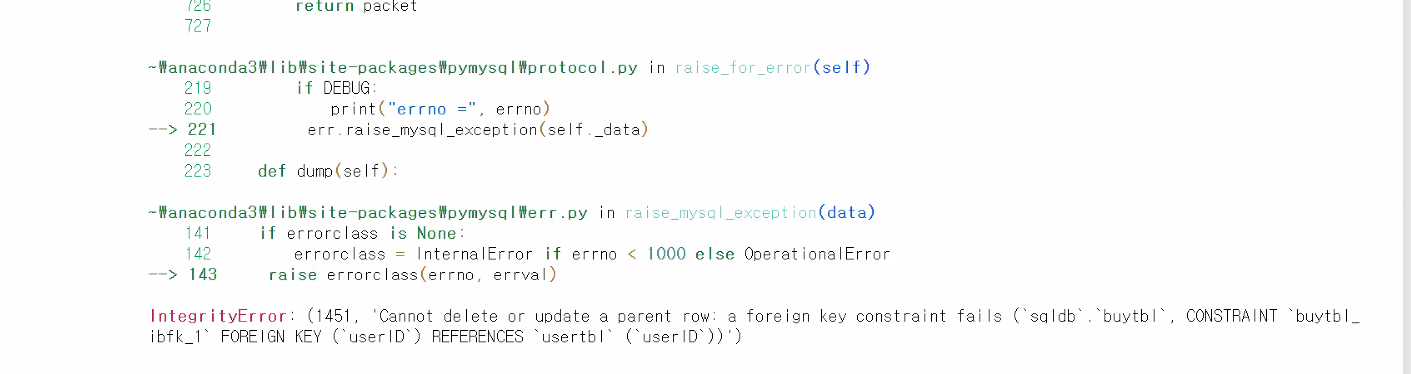

#### 에러나면 정상입니다.
* buyTbl 에 해당 userID를 참조하는 데이터가 있기 때문입니다.
